## Features in the dataset.

-ID - Unique id.

-City_Code - Code for the city of users.

-Region_Code - Code for the region of the users.

-Accomodation_Type - Customer owns/rents the house.

-Reco_Insurance_Type - Joint or individual type for the recommended insurance.

-Upper_Age - Maximium age of the customer.

-Lower_Age - Minimium age of the customer.

-Is_Spouse - If the customer is married or not.

-Health Indicator - Encoded values for health of the customer.

-Holding_Policy_Duration - Duration in year of holding policy.

-Holding_Policy_Type - Type of holding policy.

-Reco_Policy_Cat - Encoded values of recommended health insurance.

-Reco_Policy_Premium - Annual premium(INR) for the recommended health insurance.

# Importing the required packages

In [1]:
# see the value of multiple statements at once
# output for all commands in python jupyter notebook

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# to suppress the warnings

import warnings
warnings.filterwarnings('ignore')


In [2]:
# importing the packages

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
import math
import time
import itertools as it
from itertools import combinations



# This magic command line tells the notebook to show plots inline
%matplotlib inline

# Set a style/theme to the plots
sns.set_style(style='darkgrid')
plt.style.use('ggplot')

# Load the dataset

In [3]:
df = pd.read_csv('train.csv')

In [4]:
len(df)

10000

In [5]:
df.shape

(10000, 15)

In [6]:
df

,Unnamed: 0,ID,City_Code,Region_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Response
0,27385,27386,C3,64,Owned,Individual,36,36,No,X1,14+,2.0,16,13320.0,0
1,33499,33500,C3,2955,Owned,Individual,66,66,No,X6,10,1.0,19,16152.0,0
2,7997,7998,C1,1542,Rented,Individual,24,24,No,NaN,3,1.0,16,7310.0,0
3,33032,33033,C26,772,Rented,Individual,75,75,No,X1,1,3.0,16,15792.0,0
4,30516,30517,C2,1510,Owned,Joint,59,58,Yes,X1,14+,4.0,17,23673.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,5203,5204,C3,13,Owned,Joint,47,40,Yes,X5,NaN,NaN,19,27840.0,1
9996,35448,35449,C5,1477,Rented,Individual,34,34,No,NaN,6,1.0,4,10560.0,0
9997,47253,47254,C1,2357,Owned,Individual,64,64,No,X1,8,2.0,19,14716.0,0
9998,42544,42545,C1,1443,Rented,Individual,53,53,No,X5,14+,3.0,13,11664.0,0


# Observations :
It shows that there are 14 independent variables and one dependent variable (Response column).

All the records are  not numeric in the dataset.

Accomodation_Type,Reco_Insurance_Type and Is_Spouse are categorical columns

# checking for the null values

In [7]:
for i in df.columns:
    print('column name:',i)
    print(df[i].value_counts())
    print('**********************************')

column name: Unnamed: 0
22525    1
20216    1
23841    1
5408     1
48413    1
        ..
17117    1
29403    1
47834    1
41689    1
34817    1
Name: Unnamed: 0, Length: 10000, dtype: int64
**********************************
column name: ID
34815    1
19819    1
5496     1
28023    1
23232    1
        ..
19132    1
13551    1
45677    1
23222    1
43841    1
Name: ID, Length: 10000, dtype: int64
**********************************
column name: City_Code
C1     1796
C2     1505
C3      966
C4      727
C9      428
C7      390
C8      371
C6      361
C10     335
C5      264
C15     239
C11     231
C16     219
C17     211
C13     193
C20     179
C12     168
C19     168
C14     153
C21     136
C24     129
C18     127
C23     123
C22     102
C26      89
C29      71
C25      66
C27      57
C33      54
C28      47
C32      39
C34      25
C30      12
C36      12
C31       4
C35       3
Name: City_Code, dtype: int64
**********************************
column name: Region_Code
1       23
6       

In [8]:
df.info

<bound method DataFrame.info of       Unnamed: 0     ID City_Code  Region_Code Accomodation_Type  \
0          27385  27386        C3           64             Owned   
1          33499  33500        C3         2955             Owned   
2           7997   7998        C1         1542            Rented   
3          33032  33033       C26          772            Rented   
4          30516  30517        C2         1510             Owned   
...          ...    ...       ...          ...               ...   
9995        5203   5204        C3           13             Owned   
9996       35448  35449        C5         1477            Rented   
9997       47253  47254        C1         2357             Owned   
9998       42544  42545        C1         1443            Rented   
9999        7864   7865        C7         1476             Owned   

     Reco_Insurance_Type  Upper_Age  Lower_Age Is_Spouse Health Indicator  \
0             Individual         36         36        No               X1 

In [9]:
df.dtypes

Unnamed: 0                   int64
ID                           int64
City_Code                   object
Region_Code                  int64
Accomodation_Type           object
Reco_Insurance_Type         object
Upper_Age                    int64
Lower_Age                    int64
Is_Spouse                   object
Health Indicator            object
Holding_Policy_Duration     object
Holding_Policy_Type        float64
Reco_Policy_Cat              int64
Reco_Policy_Premium        float64
Response                     int64
dtype: object

In [10]:
df.isnull().sum()

Unnamed: 0                    0
ID                            0
City_Code                     0
Region_Code                   0
Accomodation_Type             0
Reco_Insurance_Type           0
Upper_Age                     0
Lower_Age                     0
Is_Spouse                     0
Health Indicator           2329
Holding_Policy_Duration    4054
Holding_Policy_Type        4054
Reco_Policy_Cat               0
Reco_Policy_Premium           0
Response                      0
dtype: int64

# Observations

Health Indicator,Holding_Policy_Duration and Holding_Policy_Type columns have null values. 

### Target class distribution

In [11]:
df['Response'].value_counts()

0    7541
1    2459
Name: Response, dtype: int64

In [12]:
df.columns

Index(['Unnamed: 0', 'ID', 'City_Code', 'Region_Code', 'Accomodation_Type',
       'Reco_Insurance_Type', 'Upper_Age', 'Lower_Age', 'Is_Spouse',
       'Health Indicator', 'Holding_Policy_Duration', 'Holding_Policy_Type',
       'Reco_Policy_Cat', 'Reco_Policy_Premium', 'Response'],
      dtype='object')

# Interpolate the missing values 

In [13]:
# to interpolate the missing values  
#dataset.interpolate(method ='linear', limit_direction ='forward')


df.fillna(axis=0, method='ffill', inplace=True)

In [14]:
df.isnull().sum()

Unnamed: 0                 0
ID                         0
City_Code                  0
Region_Code                0
Accomodation_Type          0
Reco_Insurance_Type        0
Upper_Age                  0
Lower_Age                  0
Is_Spouse                  0
Health Indicator           0
Holding_Policy_Duration    0
Holding_Policy_Type        0
Reco_Policy_Cat            0
Reco_Policy_Premium        0
Response                   0
dtype: int64

In [15]:
df.isnull().head()

,Unnamed: 0,ID,City_Code,Region_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Response
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


# Observations

 - It shows the no null values present in the dataset.
 - 'True' represents the null values and 'False' represents there are no null values in the dataset.

# Descriptive Statistics

In [16]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,10000.0,25513.42030,14789.327793,7.0,12518.25,25511.5,38329.75,50873.0
ID,10000.0,25514.42030,14789.327793,8.0,12519.25,25512.5,38330.75,50874.0
Region_Code,10000.0,1723.51090,1416.809648,1.0,517.00,1382.0,2637.00,6193.0
Upper_Age,10000.0,44.76560,17.281705,18.0,28.00,44.0,59.00,75.0
Lower_Age,10000.0,42.65650,17.316140,16.0,27.00,40.0,57.00,75.0
Holding_Policy_Type,10000.0,2.43250,1.028956,1.0,1.00,3.0,3.00,4.0
Reco_Policy_Cat,10000.0,15.09070,6.350237,1.0,12.00,17.0,20.00,22.0
Reco_Policy_Premium,10000.0,14182.68146,6538.837384,2280.0,9278.40,13214.0,18070.00,42256.0
Response,10000.0,0.24590,0.430641,0.0,0.00,0.0,0.00,1.0


In [17]:
df.corr()

,Unnamed: 0,ID,Region_Code,Upper_Age,Lower_Age,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Response
Unnamed: 0,1.000000,1.000000,-0.002869,0.012612,0.015944,0.014433,-0.000582,0.008014,0.006875
ID,1.000000,1.000000,-0.002869,0.012612,0.015944,0.014433,-0.000582,0.008014,0.006875
Region_Code,-0.002869,-0.002869,1.000000,-0.010383,-0.009397,0.011720,-0.068594,-0.018902,-0.006917
Upper_Age,0.012612,0.012612,-0.010383,1.000000,0.922250,0.084159,0.021442,0.791601,0.008082
Lower_Age,0.015944,0.015944,-0.009397,0.922250,1.000000,0.065367,0.024647,0.614515,-0.000367
Holding_Policy_Type,0.014433,0.014433,0.011720,0.084159,0.065367,1.000000,0.046939,0.098689,0.005300
Reco_Policy_Cat,-0.000582,-0.000582,-0.068594,0.021442,0.024647,0.046939,1.000000,0.054974,0.119623
Reco_Policy_Premium,0.008014,0.008014,-0.018902,0.791601,0.614515,0.098689,0.054974,1.000000,0.010099
Response,0.006875,0.006875,-0.006917,0.008082,-0.000367,0.005300,0.119623,0.010099,1.000000


In [18]:
# converting 'Holding_Policy_Type' to int 

df['Holding_Policy_Type'] = df['Holding_Policy_Type'].astype(int) 


In [19]:
df.dtypes

Unnamed: 0                   int64
ID                           int64
City_Code                   object
Region_Code                  int64
Accomodation_Type           object
Reco_Insurance_Type         object
Upper_Age                    int64
Lower_Age                    int64
Is_Spouse                   object
Health Indicator            object
Holding_Policy_Duration     object
Holding_Policy_Type          int32
Reco_Policy_Cat              int64
Reco_Policy_Premium        float64
Response                     int64
dtype: object

In [20]:
# Getting all the Object Dtypes 

columns = [column for column in df.columns if df[column].dtype == 'object']

In [21]:
columns

['City_Code',
 'Accomodation_Type',
 'Reco_Insurance_Type',
 'Is_Spouse',
 'Health Indicator',
 'Holding_Policy_Duration']

# Label encoding

In [22]:
# Label encoding for “Accomodation_Type” and “Reco_Insurance_Type” and "Is_Spouse"

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['Accomodation_Type'] = le.fit_transform(df['Accomodation_Type'])
df['Reco_Insurance_Type'] = le.fit_transform(df['Reco_Insurance_Type'])
df['Is_Spouse'] = le.fit_transform(df['Is_Spouse'])

In [23]:
df

,Unnamed: 0,ID,City_Code,Region_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Response
0,27385,27386,C3,64,0,0,36,36,0,X1,14+,2,16,13320.0,0
1,33499,33500,C3,2955,0,0,66,66,0,X6,10,1,19,16152.0,0
2,7997,7998,C1,1542,1,0,24,24,0,X6,3,1,16,7310.0,0
3,33032,33033,C26,772,1,0,75,75,0,X1,1,3,16,15792.0,0
4,30516,30517,C2,1510,0,1,59,58,1,X1,14+,4,17,23673.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,5203,5204,C3,13,0,1,47,40,1,X5,8,2,19,27840.0,1
9996,35448,35449,C5,1477,1,0,34,34,0,X5,6,1,4,10560.0,0
9997,47253,47254,C1,2357,0,0,64,64,0,X1,8,2,19,14716.0,0
9998,42544,42545,C1,1443,1,0,53,53,0,X5,14+,3,13,11664.0,0


# Checking duplicate rows

In [24]:
duplicate=df[df.duplicated()]
print(duplicate)

Empty DataFrame
Columns: [Unnamed: 0, ID, City_Code, Region_Code, Accomodation_Type, Reco_Insurance_Type, Upper_Age, Lower_Age, Is_Spouse, Health Indicator, Holding_Policy_Duration, Holding_Policy_Type, Reco_Policy_Cat, Reco_Policy_Premium, Response]
Index: []


In [25]:
df

,Unnamed: 0,ID,City_Code,Region_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Response
0,27385,27386,C3,64,0,0,36,36,0,X1,14+,2,16,13320.0,0
1,33499,33500,C3,2955,0,0,66,66,0,X6,10,1,19,16152.0,0
2,7997,7998,C1,1542,1,0,24,24,0,X6,3,1,16,7310.0,0
3,33032,33033,C26,772,1,0,75,75,0,X1,1,3,16,15792.0,0
4,30516,30517,C2,1510,0,1,59,58,1,X1,14+,4,17,23673.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,5203,5204,C3,13,0,1,47,40,1,X5,8,2,19,27840.0,1
9996,35448,35449,C5,1477,1,0,34,34,0,X5,6,1,4,10560.0,0
9997,47253,47254,C1,2357,0,0,64,64,0,X1,8,2,19,14716.0,0
9998,42544,42545,C1,1443,1,0,53,53,0,X5,14+,3,13,11664.0,0


## Perform Exploratory Data Analysis

**To Do:**
1. Perform Univaraite Analysis (Basic pandas statistical description)
2. Perform Bivaraite Analysis (Pandas Cross Tabs)
3. Visualisations - 
    * Univariate - Histograms, boxplot, PDFs, countplot, etc
    * Bivariate - Scatterplot, Boxplots, Pairplot, etc
4. Write proper observations after each plot
5. At the end of the notebook, summarize it with all the best observations you got.

### Pandas Cross Tabs

In [26]:
df.City_Code.value_counts()
df.Accomodation_Type.value_counts()
df.Reco_Insurance_Type.value_counts()
df.Is_Spouse.value_counts()
df.Holding_Policy_Duration.value_counts()

C1     1796
C2     1505
C3      966
C4      727
C9      428
C7      390
C8      371
C6      361
C10     335
C5      264
C15     239
C11     231
C16     219
C17     211
C13     193
C20     179
C12     168
C19     168
C14     153
C21     136
C24     129
C18     127
C23     123
C22     102
C26      89
C29      71
C25      66
C27      57
C33      54
C28      47
C32      39
C34      25
C30      12
C36      12
C31       4
C35       3
Name: City_Code, dtype: int64

0    5509
1    4491
Name: Accomodation_Type, dtype: int64

0    7956
1    2044
Name: Reco_Insurance_Type, dtype: int64

0    8318
1    1682
Name: Is_Spouse, dtype: int64

14+    1498
1      1440
2      1343
3      1177
4       866
5       745
6       658
7       561
8       435
9       336
10      283
13      181
14      171
12      170
11      136
Name: Holding_Policy_Duration, dtype: int64

In [27]:
pd.crosstab(df.City_Code, df.Reco_Policy_Premium)

Reco_Policy_Premium,2280.0,2304.0,2484.0,2532.0,2600.0,2652.0,2668.0,2712.0,2744.0,2784.0,...,38080.0,38188.8,38304.0,39340.8,39528.0,39974.4,40067.2,40918.4,40983.0,42256.0
City_Code,,,,,,,,,,,,,,,,,,,,,
C1,0,0,0,0,0,0,0,0,0,0,...,1,0,0,1,1,0,0,1,1,0
C10,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
C11,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
C12,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
C13,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
C14,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
C15,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
C16,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
C17,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


TypeError: Cannot interpret '<attribute 'dtype' of 'numpy.generic' objects>' as a data type

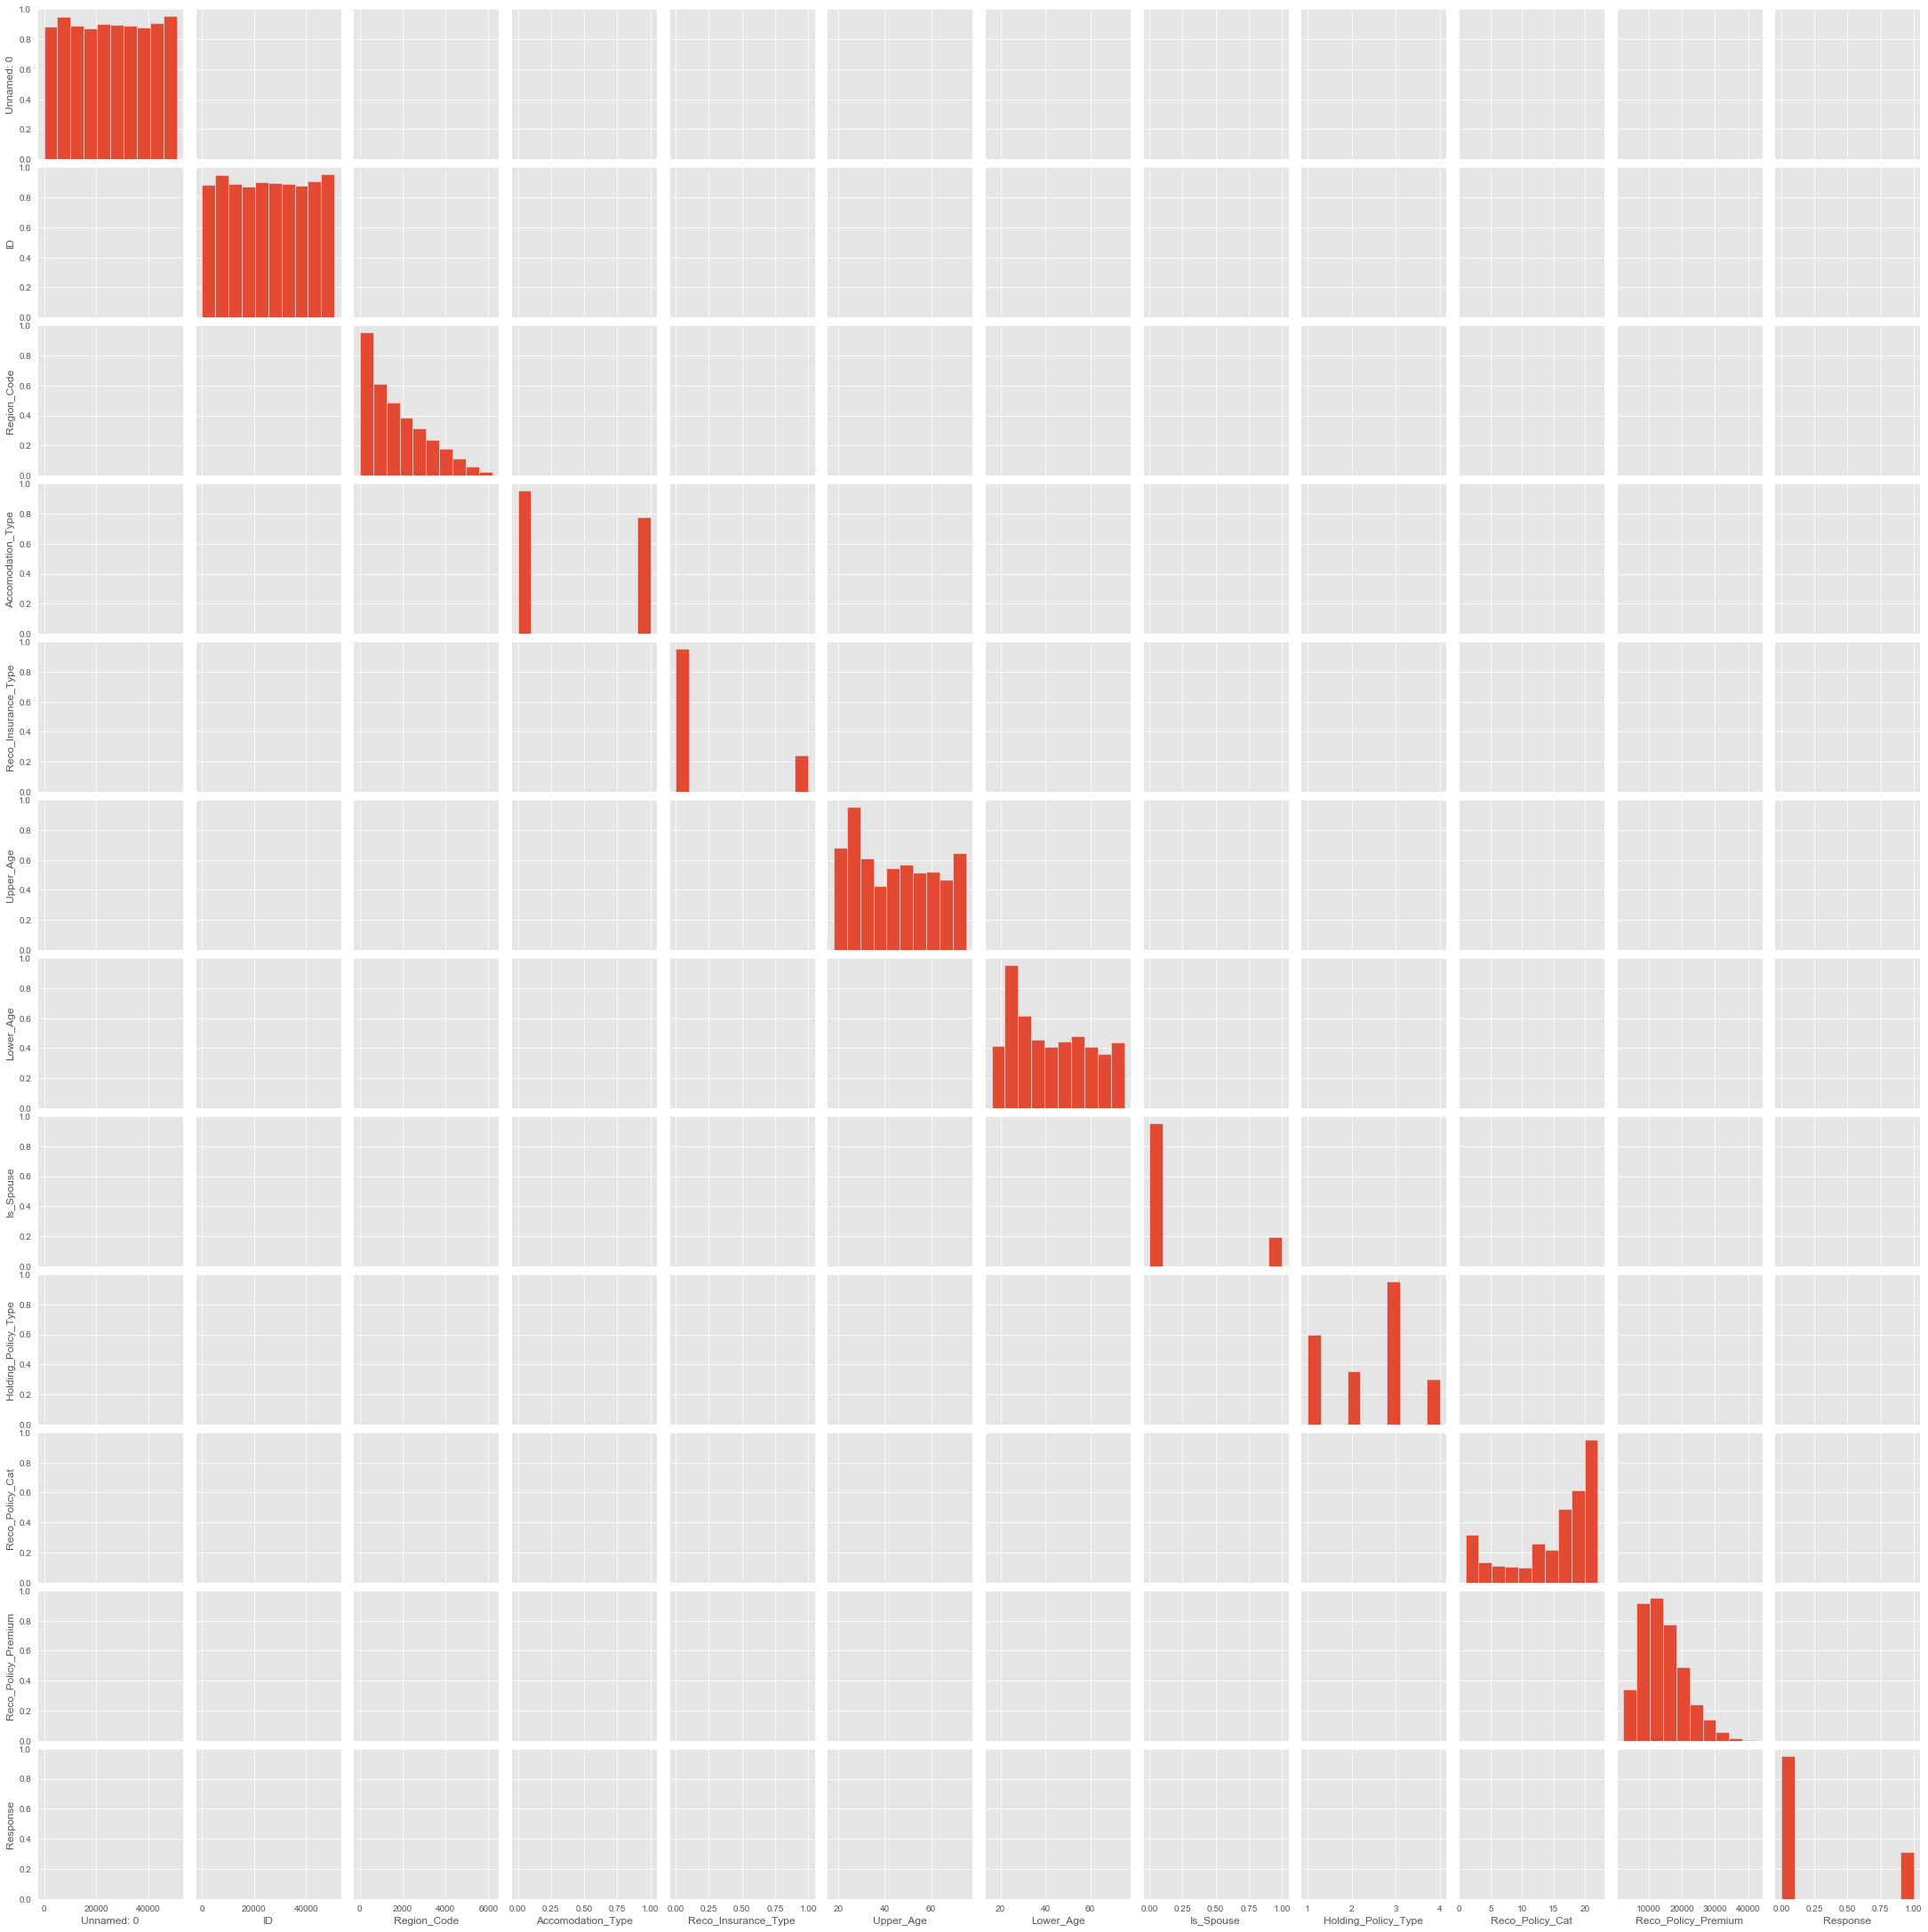

In [28]:
sns.pairplot(df)

In [ ]:
sns.boxplot(x=df.Reco_Policy_Premium)

In [ ]:
sns.boxplot(x=df.Holding_Policy_Type)

In [ ]:
sns.distplot(df.Reco_Policy_Premium)

In [ ]:
plt.figure(figsize=[17,8])
sns.heatmap(df.corr(),linecolor='white',linewidths=2,annot=True);

In [ ]:
df.hist(bins=50,figsize=(10,10))

### Bivariate Analysis

In [ ]:
plt.subplots(figsize=(12, 6))
ax = sns.boxplot(data=df)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45);

### City Code
#### Lets see the number of cities and see how many customers are there

In [ ]:
fig = plt.figure(figsize =(20, 15))

df['City_Code'].value_counts()[:36].plot(kind='barh', color='blue')

### Let's see city-wise customers interests in recommended policy

In [ ]:
plt.figure(figsize = (20, 10))
sns.barplot(x = 'City_Code', y = 'Reco_Policy_Premium', data = df)

plt.title("City_Code vs Recommended policy")

In [ ]:
plt.figure(figsize = (20, 10))
sns.swarmplot(x = 'City_Code', y = 'Reco_Policy_Premium', data = df)

plt.title("City_Code vs Recommended policy")

### City_Code VS Response


In [ ]:
plt.figure(figsize=(20,10))
sns.countplot(x='City_Code',hue='Response',data=df)

### Observations:
  - some cites like c1,c2 consist high distribution .
  -  In all of the cities, class(response) 0 is dominating .

### Region Code
#### Let's see the number of regions and region-wise customer interests in recommended policy.

In [ ]:

sns.barplot(x = 'Region_Code', y = 'Reco_Policy_Premium', data = df)

plt.title("City_Code vs Recommended policy")


Accomodation_Type vs Response

In [ ]:
plt.figure(figsize=(20,10))
sns.countplot(x='Accomodation_Type',hue='Response',data=df)

### Accomodation Type
#### Let's see how many customers are living in their own house or rented houseand see how their interests vary in recommended policy.

In [ ]:
sns.barplot(x = 'Accomodation_Type', y = 'Reco_Policy_Premium', data = df)

plt.title("Accomodation_Type vs Recommended policy")

In [ ]:
pd.crosstab(df.Accomodation_Type, df.Reco_Policy_Premium)

#### Let's see the city-wise accomodation type and customer response

In [ ]:
sns.barplot(x = 'City_Code', y = 'Response', data = df)

plt.title("City wise Accomodation_Type vs Response")

### Reco Insurance Type
Let's see the various recommended insurance types and customer response to them

In [ ]:
sns.barplot(x = 'Reco_Insurance_Type', y = 'Response', data = df)

plt.title("Reco_Insurance_Type vs Customer Response")

In [ ]:
# Reco_Insurance_Type vs Response

plt.figure(figsize=(20,10))
sns.countplot(x='Reco_Insurance_Type',hue='Response',data=df)

Observations:
- 0 is individual
- 1 is joint
- Most of customers interested on individual insurance

In [ ]:
plt.figure(figsize=(15,10))
sns.distplot(df['Reco_Policy_Premium'], label='Train data')

In [ ]:
df

### Health IndicatorVS Response

In [ ]:
sns.countplot(x='Health Indicator',hue='Response',data=df)

### Holding_Policy_Duration VS Response

In [ ]:
#plt.figure(figsize=(20,10))
sns.countplot(x='Holding_Policy_Duration',hue='Response',data=df)

### Upper Age

In [ ]:
plt.figure(figsize=(15,10))
sns.distplot(df['Upper_Age'], label='df')

In [ ]:
#Upper_Age vs Response

#plt.figure(figsize=(10,8))
sns.boxplot(x='Response', y='Upper_Age', data=df)
plt.ylabel("upper age", fontsize=12)
plt.xlabel("Response", fontsize=12)
plt.show()

### Lower Age


In [ ]:
plt.figure(figsize=(15,10))
sns.distplot(df['Lower_Age'], label='df')

In [ ]:
#plt.figure(figsize=(10,8))
sns.boxplot(x='Response', y='Lower_Age', data=df)
plt.ylabel("Lower age", fontsize=12)
plt.xlabel("Response", fontsize=12)
plt.show()

### Reco_Policy_Premium

In [ ]:
plt.figure(figsize=(15,10))
sns.distplot(df['Reco_Policy_Premium'], label='df')

### Observations After EDA

The dataset consists of 13 features.
It is a binary classification problem.
The dataset is imbalanced.
Most of the features are categorical.

# Drop all the unwanted columns.

In [ ]:
# Drop features, because it is not much important for prediction.

df = df.drop('ID', axis = 1)

df = df.drop('City_Code', axis = 1)
df = df.drop('Region_Code', axis = 1)

df = df.drop('Health Indicator', axis = 1)
df = df.drop('Holding_Policy_Duration', axis = 1)


# Seperating dependent and independent variables

In [ ]:
x=df.drop(['Response'],axis=1) #contain all  independent variable
y=df['Response']           #dependent variable

In [ ]:
df.shape

## Assigning X and y

In [ ]:
# Assigning X and y

X = df.iloc[:,:8]
y = df.iloc[:,8]

In [ ]:
print(X)

In [ ]:
print(y)

### Spliting of data into train and test data

In [ ]:
#split our dataset

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    df.drop(columns= 'Response', axis = 1), 
    df['Response'], 
    test_size=0.2)

print(' x_train: ',X_train.shape, '\n',
      'y_train:',y_train.shape,'\n',
      'x_test:',X_test.shape,'\n',
      'y_test:',y_test.shape)

# Model Selection

In [ ]:
# Model 1: Logistic Regression

from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

model=LogisticRegression(random_state=0)
model=model.fit(X_train,y_train)
pred=model.predict(X_test)
lr_probability =model.predict_proba(X_test)[:,1]
y_pred = model.predict(X_test)

acc_lr=accuracy_score(y_test, y_pred)
recall_lr=recall_score(y_test, y_pred, zero_division = 1)
precision_lr=precision_score(y_test, y_pred, zero_division = 1)
f1score_lr=f1_score(y_test, y_pred, zero_division = 1)
AUC_LR=roc_auc_score(y_test, y_pred)
#print accuracy and Auc values of model
print("Accuracy_score of logistic  : ", accuracy_score(y_test,y_pred))
print("ROC_AUC Score:",AUC_LR)

In [ ]:
print(classification_report(y_pred,y_test))

## ROC CURVE

In [ ]:
from sklearn.metrics import roc_curve
fpr, tpr, _ = roc_curve(y_test, lr_probability)

plt.title('Logistic Regression ROC curve')
plt.xlabel('FPR (Precision)')
plt.ylabel('TPR (Recall)')

plt.plot(fpr,tpr)
plt.plot((0,1), ls='dashed',color='black')
plt.show()

## Confusion Matrix

In [ ]:
cm=confusion_matrix(y_test,pred)
print(cm)
sns.heatmap(cm,annot=True,cmap='BuPu')

## Random Forest Classifier

In [ ]:
# Model 2: Random Forest Classifier

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

model=RandomForestClassifier(n_estimators = 100, random_state = 0)
model=model.fit(X_train,y_train)
pred=model.predict(X_test)
rf_probability =model.predict_proba(X_test)[:,1]
y_pred = model.predict(X_test)

acc_rf=accuracy_score(y_test, y_pred)
recall_rf=recall_score(y_test, y_pred, zero_division = 1)
precision_rf=precision_score(y_test, y_pred, zero_division = 1)
f1score_rf=f1_score(y_test, y_pred, zero_division = 1)
AUC_RF=roc_auc_score(y_test, y_pred)
#print accuracy and Auc values of model
print("Accuracy_score of Random_forest: ", accuracy_score(y_test,y_pred))
print("ROC_AUC Score:",AUC_RF)

In [ ]:
print(classification_report(y_pred,y_test))

## ROC CURVE

In [ ]:
from sklearn.metrics import roc_curve
fpr, tpr, _ = roc_curve(y_test, rf_probability)

plt.title('Random Forest ROC curve')
plt.xlabel('FPR (Precision)')
plt.ylabel('TPR (Recall)')

plt.plot(fpr,tpr)
plt.plot((0,1), ls='dashed',color='black')
plt.show()

## Confusion Matrix

In [ ]:
cm=confusion_matrix(y_pred,y_test)
print(cm)
sns.heatmap(cm,annot=True,cmap='RdPu')

## Decision Tree Classifier

In [ ]:
# Model 3: Decision Tree

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

model=DecisionTreeClassifier(random_state=0)
model=model.fit(X_train,y_train)
pred=model.predict(X_test)
dt_probability =model.predict_proba(X_test)[:,1]
y_pred = model.predict(X_test)

acc_dt=accuracy_score(y_test, y_pred)
recall_dt=recall_score(y_test, y_pred, zero_division = 1)
precision_dt=precision_score(y_test, y_pred, zero_division = 1)
f1score_dt=f1_score(y_test, y_pred, zero_division = 1)
AUC_DT=roc_auc_score(y_test, y_pred)
#print accuracy and Auc values of model
print("Accuracy_score of Dtree: ", accuracy_score(y_test,y_pred))
print("ROC_AUC Score:",AUC_DT)

In [ ]:
print(classification_report(y_pred,y_test))

## ROC CURVE

In [ ]:
from sklearn.metrics import roc_curve
fpr, tpr, _ = roc_curve(y_test, dt_probability)

plt.title('Decision Tree ROC curve')
plt.xlabel('FPR (Precision)')
plt.ylabel('TPR (Recall)')

plt.plot(fpr,tpr)
plt.plot((0,1), ls='dashed',color='black')
plt.show()

## Confusion Matrix

In [ ]:
cm=confusion_matrix(y_pred,y_test)
print(cm)
sns.heatmap(cm,annot=True,cmap='GnBu')

## Support vector classifier

In [ ]:
# Model 4: SVC

from sklearn import svm
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

model=svm.SVC(kernel='rbf', probability=True) 
model=model.fit(X_train,y_train)
pred=model.predict(X_test)
svc_probability =model.predict_proba(X_test)[:,1]
y_pred = model.predict(X_test)

acc_svc=accuracy_score(y_test, y_pred)
recall_svc=recall_score(y_test, y_pred, zero_division = 1)
precision_svc=precision_score(y_test, y_pred, zero_division = 1)
f1score_svc=f1_score(y_test, y_pred, zero_division = 1)
AUC_SVC=roc_auc_score(y_test, y_pred)
#print accuracy and Auc values of model
print("Accuracy_score 0f SVC: ", accuracy_score(y_test,y_pred))
print("ROC_AUC Score:",AUC_SVC)

In [ ]:
print(classification_report(y_pred,y_test))

## ROC CURVE

In [ ]:
from sklearn.metrics import roc_curve
fpr, tpr, _ = roc_curve(y_test, svc_probability)

plt.title('SVC ROC curve')
plt.xlabel('FPR (Precision)')
plt.ylabel('TPR (Recall)')

plt.plot(fpr,tpr)
plt.plot((0,1), ls='dashed',color='black')
plt.show()

## Confusion Matrix

In [ ]:
cm=confusion_matrix(y_pred,y_test)
print(cm)
sns.heatmap(cm,annot=True,cmap='RdPu')

## KNN Classifier

In [ ]:
# Model 5: KNN

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

model=KNeighborsClassifier(n_neighbors=2)
model=model.fit(X_train,y_train)
pred=model.predict(X_test)
knn_probability =model.predict_proba(X_test)[:,1]
y_pred = model.predict(X_test)

acc_knn=accuracy_score(y_test, y_pred)
recall_knn=recall_score(y_test, y_pred, zero_division = 1)
precision_knn=precision_score(y_test, y_pred, zero_division = 1)
f1score_knn=f1_score(y_test, y_pred, zero_division = 1)
AUC_KNN=roc_auc_score(y_test, y_pred)
#print accuracy and Auc values of model
print("Accuracy_score of KNN: ", accuracy_score(y_test,y_pred))
print("ROC_AUC Score:",AUC_KNN)

In [ ]:
print(classification_report(y_pred,y_test))

## ROC CURVE

In [ ]:
from sklearn.metrics import roc_curve
fpr, tpr, _ = roc_curve(y_test, knn_probability)

plt.title('KNN ROC curve')
plt.xlabel('FPR (Precision)')
plt.ylabel('TPR (Recall)')

plt.plot(fpr,tpr)
plt.plot((0,1), ls='dashed',color='black')
plt.show()

## Confusion Matrix

In [ ]:
cm=confusion_matrix(y_pred,y_test)
print(cm)
sns.heatmap(cm,annot=True,cmap='BuPu')

## Gradient Boosting

In [ ]:
# Model 6: Gradient Boosting

from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

model=GradientBoostingClassifier(n_estimators=100, random_state=0)
model=model.fit(X_train,y_train)
pred=model.predict(X_test)
gb_probability =model.predict_proba(X_test)[:,1]
y_pred = model.predict(X_test)

acc_gb=accuracy_score(y_test, y_pred)
recall_gb=recall_score(y_test, y_pred, zero_division = 1)
precision_gb=precision_score(y_test, y_pred, zero_division = 1)
f1score_gb=f1_score(y_test, y_pred, zero_division = 1)
AUC_GB=roc_auc_score(y_test, y_pred)
#print accuracy and Auc values of model
print("Accuracy_score of gradient : ", accuracy_score(y_test,y_pred))
print("ROC_AUC Score:",AUC_GB)

In [ ]:
print(classification_report(y_pred,y_test))

## ROC CURVE

In [ ]:
from sklearn.metrics import roc_curve
fpr, tpr, _ = roc_curve(y_test, gb_probability)

plt.title('Gradient Boosting ROC curve')
plt.xlabel('FPR (Precision)')
plt.ylabel('TPR (Recall)')

plt.plot(fpr,tpr)
plt.plot((0,1), ls='dashed',color='black')
plt.show()

### Confusion Matrix

In [ ]:
cm=confusion_matrix(y_pred,y_test)
print(cm)
sns.heatmap(cm,annot=True,cmap='GnBu')

## AdaBoost

In [ ]:
# Model 7: AdaBoost

from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

model=AdaBoostClassifier(n_estimators=100, random_state=0)
model=model.fit(X_train,y_train)
pred=model.predict(X_test)
ab_probability =model.predict_proba(X_test)[:,1]
y_pred = model.predict(X_test)

acc_ab=accuracy_score(y_test, y_pred)
recall_ab=recall_score(y_test, y_pred, zero_division = 1)
precision_ab=precision_score(y_test, y_pred, zero_division = 1)
f1score_ab=f1_score(y_test, y_pred, zero_division = 1)
AUC_AB=roc_auc_score(y_test, y_pred)
#print accuracy and Auc values of model
print("Accuracy : ", accuracy_score(y_test,y_pred))
print("ROC_AUC Score:",AUC_AB)

In [ ]:
print(classification_report(y_pred,y_test))

## ROC CURVE

In [ ]:
from sklearn.metrics import roc_curve
fpr, tpr, _ = roc_curve(y_test, ab_probability)

plt.title('AdaBoost ROC curve')
plt.xlabel('FPR (Precision)')
plt.ylabel('TPR (Recall)')

plt.plot(fpr,tpr)
plt.plot((0,1), ls='dashed',color='black')
plt.show()

## Confusion Matrix

In [ ]:
cm=confusion_matrix(y_pred,y_test)
print(cm)
sns.heatmap(cm,annot=True,cmap='RdPu')

## Model Comparison

In [ ]:
ind=['Logistic regression','Randomforest','Decisiontree','SVC','KNN','Gradientboosting','Adaboost']
data={"Accuracy":[acc_lr,acc_rf,acc_dt,acc_svc,acc_knn,acc_gb,acc_ab],
      "Recall":[recall_lr,recall_rf,recall_dt,recall_svc,recall_knn,recall_gb,recall_ab],
      "Precision":[precision_lr,precision_rf,precision_dt,precision_svc,precision_knn,precision_gb,precision_ab],
    'f1_score':[f1score_lr,f1score_rf,f1score_dt,f1score_svc,f1score_knn,f1score_gb,f1score_ab],
      "ROC_AUC":[AUC_LR,AUC_RF,AUC_DT,AUC_SVC,AUC_KNN,AUC_GB,AUC_AB]}
result=pd.DataFrame(data=data,index=ind)
result

### Feature Engineering


## Convert to numerical: Holding_Policy_Duration

Feature engineer long term customers
Convert '14+' to '15' / convert to numerical
